## Demostración de seguridad usando Raiz primitiva en Problema del Logaritmo Discreto

El **logaritmo discreto** consiste en encontrar el entero \( x \) que satisface:

$$
\
g^x \equiv y \pmod{p}
\
$$

donde:

- \( p \) es un número primo.
- \( g \) es una raíz primitiva de \( p \)
- \( y \) es un entero tal que $ ( y = g^x \mod p ) $.

Existen diferentes métodos para resolver este problema:
1. **Búsqueda Exhaustiva (Brute Force):**  
   Se prueban todos los valores \( x = 0, 1, 2,... p-1 \). Su complejidad es \( O(p) \) y resulta ineficiente para valores grandes.
2. **Baby-step Giant-step (BSGS):**  
   Este algoritmo reduce la complejidad a \( O($\sqrt{p}$) \) dividiendo el problema en dos fases (baby-steps y giant-steps).

## Caso real
La empresa CBA está usando siempre el mismo número $ \alpha $ para realizar todas sus claves de firma en el algoritmo DSA.
Aunque lleva muchos años usando siempre el mismo número. la última auditoria externa realizada en la empresa le han penalizado por usar Firmas Digitales poco seguras en el entorno actual.

### Objetivo
Como criptoanalista debes mostrar en la reunión de dirección porque es será muy positivo implementar un nuevo flujo de trabajo que haga las claves de firma con un $ \alpha $ que sea raiz primitiva con el módulo elegido.

¿Cual sería esa grafica que mostrarias y tu parte explicativa?


In [7]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: C:\Users\jaal2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
pip install libnum


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: C:\Users\jaal2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



  Using cached libnum-1.7.1-py3-none-any.whl (14 kB)


In [9]:
import math
import time
import random
import matplotlib.pyplot as plt
import sympy  # obtener raíces primitivas
import libnum  # para trabajar con números grandes

In [14]:
def discrete_log_brute_force(g, y, p):
    for x in range(p):
        if pow(g, x, p) == y:
            return x
    return None

# Baby-step Giant-step (BSGS)
def discrete_log_bsgs(g, y, p):
    m = math.isqrt(p - 1) + 1  # m = ceil(sqrt(p-1))
    # Baby-steps: precomputamos g^j for j = 0, 1, ..., m-1
    baby_steps = {}
    for j in range(m):
        baby_steps[pow(g, j, p)] = j

    # Calcular g^(-m) mod p
    c = pow(g, m, p)
    c_inv = pow(c, -1, p)  # O bien usando sympy.mod_inverse(c, p)

    gamma = y
for                                                                                                                                                                                                         i in range(m):
        if gamma in baby_steps:
            return i * m + baby_steps[gamma]
        gamma = (gamma * c_inv) % p
    return None


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 24)

In [21]:
# Lista de tamaños en bits para p
bit_sizes = [12, 14, 16, 18, 20]  # Se pueden agregar tamaños mayores (con precaución)
times_bruteforce = [] # tiempos de ejecución para brute force
times_bsgs = []     # tiempos de ejecución para BSGS

# Para cada tamaño en bits, se genera un primo, se obtiene una raíz primitiva,
# se elige un exponente secreto x, se calcula y y se mide el tiempo para hallar x
for bits in bit_sizes:
    p = libnum.generate_prime(bits) # primo de 'bits' bits
    g = sympy.primitive_root(p) # raíz primitiva
    
    x_true = random.randint(1, p-1) # exponente secreto
    y_val = pow(g, x_true, p) # y = g^x mod p
    
    # Medir tiempo para brute force
    start_time = time.perf_counter()
    x_bf = discrete_log_brute_force(g, y_val, p) 
    end_time = time.perf_counter()
    t_bf = end_time - start_time
    times_bruteforce.append(t_bf)
    
    # Medir tiempo para BSGS
    start_time = time.perf_counter()
    x_bsgs = discrete_log_bsgs(g, y_val, p)
    end_time = time.perf_counter()
    t_bsgs = end_time - start_time
    times_bsgs.append(t_bsgs)
    
    print(f"Bits: {bits}, p: {p}, g: {g}, x_true: {x_true}, x_bf: {x_bf}, x_bsgs: {x_bsgs}")
    print(f"Tiempo Brute Force: {t_bf:.6f} s, Tiempo BSGS: {t_bsgs:.6f} s\n")

Bits: 12, p: 2447, g: 5, x_true: 1582, x_bf: 1582, x_bsgs: 1582
Tiempo Brute Force: 0.001482 s, Tiempo BSGS: 0.000065 s

Bits: 14, p: 11549, g: 2, x_true: 2516, x_bf: 2516, x_bsgs: 2516
Tiempo Brute Force: 0.002970 s, Tiempo BSGS: 0.000151 s

Bits: 16, p: 54377, g: 5, x_true: 27076, x_bf: 27076, x_bsgs: 27076
Tiempo Brute Force: 0.074034 s, Tiempo BSGS: 0.000370 s

Bits: 18, p: 216829, g: 2, x_true: 109496, x_bf: 109496, x_bsgs: 109496
Tiempo Brute Force: 0.201356 s, Tiempo BSGS: 0.000492 s

Bits: 20, p: 1044179, g: 2, x_true: 550322, x_bf: 550322, x_bsgs: 550322
Tiempo Brute Force: 0.815187 s, Tiempo BSGS: 0.001073 s



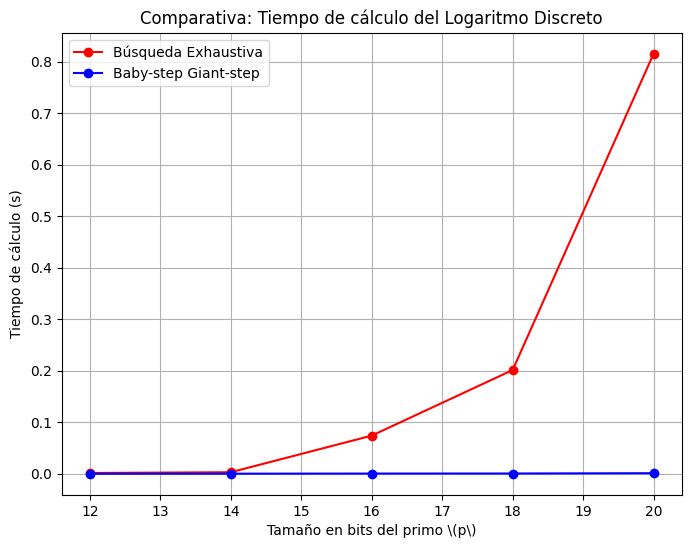

In [22]:
# Graficar la comparativa
plt.figure(figsize=(8,6))
plt.plot(bit_sizes, times_bruteforce, marker='o', linestyle='-', color='red', label='Búsqueda Exhaustiva')
plt.plot(bit_sizes, times_bsgs, marker='o', linestyle='-', color='blue', label='Baby-step Giant-step')
plt.xlabel("Tamaño en bits del primo \(p\)")
plt.ylabel("Tiempo de cálculo (s)")
plt.title("Comparativa: Tiempo de cálculo del Logaritmo Discreto")
plt.grid(True)
plt.legend()
plt.show()

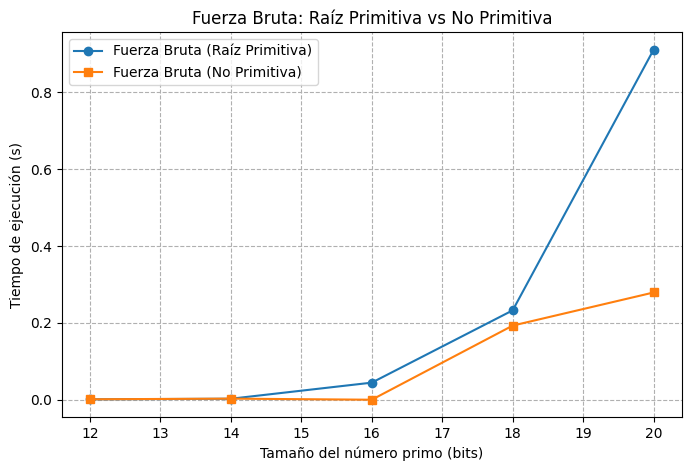

In [24]:
import sympy
import time
import random
import matplotlib.pyplot as plt
import math

def generate_prime(bits):
    """Genera un número primo de 'bits' bits usando sympy."""
    return sympy.randprime(2**(bits-1), 2**bits)

def discrete_log_brute_force(g, y, p):
    for x in range(p):
        if pow(g, x, p) == y:
            return x
    return None

# Lista de tamaños en bits para p
bit_sizes = [12, 14, 16, 18, 20]
times_bruteforce_primitive = []
times_bruteforce_non_primitive = []

# Para cada tamaño en bits, se genera un primo, se obtiene una raíz primitiva y un número aleatorio
for bits in bit_sizes:
    p = generate_prime(bits)
    g_primitive = sympy.primitive_root(p)
    g_non_primitive = random.randint(2, p - 1)

    x_true = random.randint(1, p - 1)
    y_val_primitive = pow(g_primitive, x_true, p)
    y_val_non_primitive = pow(g_non_primitive, x_true, p)

    # Medir tiempo para brute force con raíz primitiva
    start_time = time.perf_counter()
    discrete_log_brute_force(g_primitive, y_val_primitive, p)
    end_time = time.perf_counter()
    times_bruteforce_primitive.append(end_time - start_time)

    # Medir tiempo para brute force sin raíz primitiva
    start_time = time.perf_counter()
    discrete_log_brute_force(g_non_primitive, y_val_non_primitive, p)
    end_time = time.perf_counter()
    times_bruteforce_non_primitive.append(end_time - start_time)

# Generar gráfica para Fuerza Bruta
plt.figure(figsize=(8, 5))
plt.plot(bit_sizes, times_bruteforce_primitive, marker='o', linestyle='-', label='Fuerza Bruta (Raíz Primitiva)')
plt.plot(bit_sizes, times_bruteforce_non_primitive, marker='s', linestyle='-', label='Fuerza Bruta (No Primitiva)')
plt.xlabel('Tamaño del número primo (bits)')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Fuerza Bruta: Raíz Primitiva vs No Primitiva')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

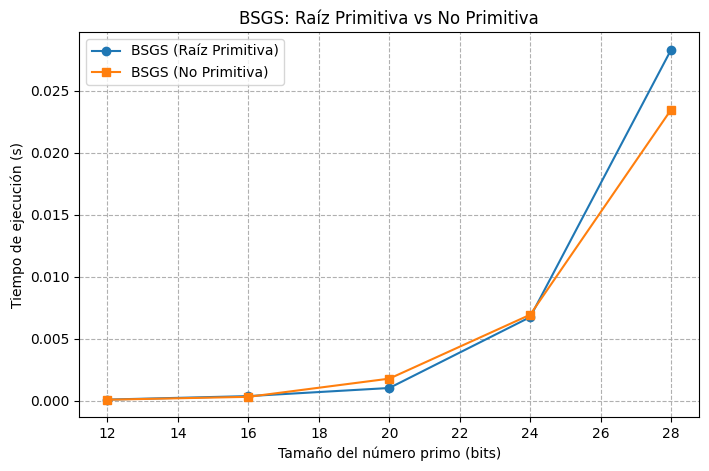

In [98]:
def generate_prime(bits):
    """Genera un número primo de 'bits' bits usando sympy."""
    return sympy.randprime(2**(bits-1), 2**bits)

def discrete_log_bsgs(g, y, p):
    m = math.isqrt(p - 1) + 1
    baby_steps = {pow(g, j, p): j for j in range(m)}
    c = pow(g, m, p)
    c_inv = pow(c, -1, p)
    gamma = y
    for i in range(m):
        if gamma in baby_steps:
            return i * m + baby_steps[gamma]
        gamma = (gamma * c_inv) % p
    return None

# Lista de tamaños en bits para p
bit_sizes = [12, 16, 20, 24, 28]
times_bsgs_primitive = []
times_bsgs_non_primitive = []

# Para cada tamaño en bits, se genera un primo, se obtiene una raíz primitiva y un número aleatorio
for bits in bit_sizes:
    p = generate_prime(bits)
    g_primitive = sympy.primitive_root(p)
    g_non_primitive = random.randint(2, p - 1)

    x_true = random.randint(1, p - 1)
    y_val_primitive = pow(g_primitive, x_true, p)
    y_val_non_primitive = pow(g_non_primitive, x_true, p)

    # Medir tiempo para BSGS con raíz primitiva
    start_time = time.perf_counter()
    discrete_log_bsgs(g_primitive, y_val_primitive, p)
    end_time = time.perf_counter()
    times_bsgs_primitive.append(end_time - start_time)

    # Medir tiempo para BSGS sin raíz primitiva
    start_time = time.perf_counter()
    discrete_log_bsgs(g_non_primitive, y_val_non_primitive, p)
    end_time = time.perf_counter()
    times_bsgs_non_primitive.append(end_time - start_time)

# Generar gráfica para BSGS
plt.figure(figsize=(8, 5))
plt.plot(bit_sizes, times_bsgs_primitive, marker='o', linestyle='-', label='BSGS (Raíz Primitiva)')
plt.plot(bit_sizes, times_bsgs_non_primitive, marker='s', linestyle='-', label='BSGS (No Primitiva)')
plt.xlabel('Tamaño del número primo (bits)')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('BSGS: Raíz Primitiva vs No Primitiva')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

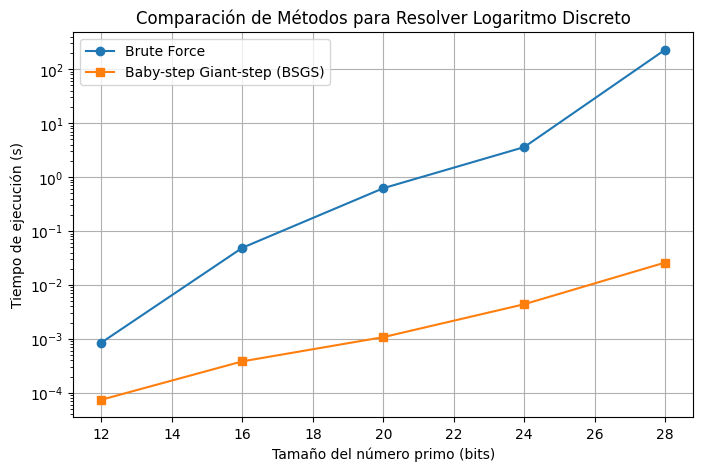

In [100]:
import math

# Corregir el cálculo de la raíz cuadrada usando math.isqrt
def discrete_log_bsgs(g, y, p):
    m = math.isqrt(p - 1) + 1  # Usamos math.isqrt para la raíz cuadrada entera
    baby_steps = {pow(g, j, p): j for j in range(m)}
    c = pow(g, m, p)
    c_inv = pow(c, -1, p)
    gamma = y
    for i in range(m):
        if gamma in baby_steps:
            return i * m + baby_steps[gamma]
        gamma = (gamma * c_inv) % p
    return None

# Volver a generar los datos y calcular tiempos
times_bruteforce = []
times_bsgs = []

for bits in bit_sizes:
    p = generate_prime(bits)
    g = sympy.primitive_root(p)

    x_true = random.randint(1, p - 1)
    y_val = pow(g, x_true, p)

    # Medir tiempo para brute force
    start_time = time.perf_counter()
    x_bf = discrete_log_brute_force(g, y_val, p)
    end_time = time.perf_counter()
    t_bf = end_time - start_time
    times_bruteforce.append(t_bf)

    # Medir tiempo para BSGS
    start_time = time.perf_counter()
    x_bsgs = discrete_log_bsgs(g, y_val, p)
    end_time = time.perf_counter()
    t_bsgs = end_time - start_time
    times_bsgs.append(t_bsgs)

# Generar la gráfica
plt.figure(figsize=(8, 5))
plt.plot(bit_sizes, times_bruteforce, marker='o', linestyle='-', label='Brute Force')
plt.plot(bit_sizes, times_bsgs, marker='s', linestyle='-', label='Baby-step Giant-step (BSGS)')
plt.xlabel('Tamaño del número primo (bits)')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Comparación de Métodos para Resolver Logaritmo Discreto')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()
